In [129]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import hist
%matplotlib inline

In [130]:
tb = pd.read_csv('data/results.csv')
print(tb)

             date      home_team   away_team  home_score  away_score  \
0      1872-11-30       Scotland     England           0           0   
1      1873-03-08        England    Scotland           4           2   
2      1874-03-07       Scotland     England           2           1   
3      1875-03-06        England    Scotland           2           2   
4      1876-03-04       Scotland     England           3           0   
...           ...            ...         ...         ...         ...   
41581  2020-01-10       Barbados      Canada           1           4   
41582  2020-01-12         Kosovo      Sweden           0           1   
41583  2020-01-15         Canada     Iceland           0           1   
41584  2020-01-19    El Salvador     Iceland           0           1   
41585  2020-02-01  United States  Costa Rica           1           0   

      tournament     city        country  neutral  
0       Friendly  Glasgow       Scotland    False  
1       Friendly   London      

In [131]:
average_home_score = tb['home_score'].mean()
average_away_score = tb['away_score'].mean()

tb['total_goals'] = tb['home_score'] + tb['away_score']
tb['home_win'] = np.where(tb['neutral'] == False, tb['home_score'] > tb['away_score'], '')
total_home_wins_perc = (tb['home_win'].astype('str').value_counts()['True'] / tb.count()) * 100


ValueError: arrays must all be same length

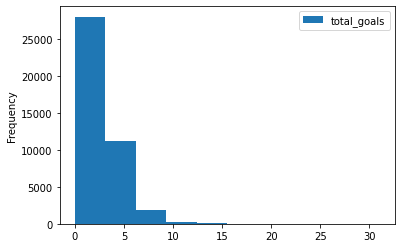

In [132]:
#making the histogram
tb.plot(x='date', y='total_goals', kind='hist')

#create table of countries
countries_colums = ['country']
countries_all = np.unique(tb[['home_team', 'away_team']].values)

home_goals = []
away_goals = []
total_goals = []
no_home_games = []
no_away_games = []
win_games = []
loss_games = []
total_games = []
win_percentage = []
loss_percentage = []
win_percentage_as_home = []
win_percentage_as_away = []
loss_percentage_as_home = []
loss_percentage_as_away = []
# countries = pd.DataFrame(countries_all, columns = countries_colums)

for country in countries_all:
    is_country_as_home = tb['home_team'] == country
    is_country_as_away = tb['away_team'] == country
    country_rows_as_home = tb[is_country_as_home]
    country_rows_as_away = tb[is_country_as_away]
    country_rows_win_as_home = country_rows_as_home[country_rows_as_home['home_score'] > country_rows_as_home['away_score']]
    country_rows_win_as_away = country_rows_as_away[country_rows_as_away['away_score'] > country_rows_as_away['home_score']]
    total_goals_as_home = country_rows_as_home['home_score'].sum()
    total_goals_as_away = country_rows_as_away['away_score'].sum()
    total_games_as_home = len(country_rows_as_home)
    total_games_as_away = len(country_rows_as_away)
    total_games_as = total_games_as_away + total_games_as_home

    total_wins_as_home = len(country_rows_win_as_home)
    total_wins_as_away = len(country_rows_win_as_away)
    total_wins = total_wins_as_home + total_wins_as_away
    total_losses = total_games_as - total_wins
    win_perc = total_wins / total_games_as
    loss_perc = total_losses / total_games_as

    home_goals.append(total_goals_as_home)
    away_goals.append(total_goals_as_away)
    total_goals.append(total_goals_as_home + total_goals_as_away)
    no_home_games.append(total_games_as_home)
    no_away_games.append(total_games_as_away)
    win_games.append(total_wins)
    loss_games.append(total_losses)
    total_games.append(total_games_as)
    win_percentage.append(win_perc)
    loss_percentage.append(loss_perc)

    # win_percentage
    # loss_percentage

# iterate over the countries_all array, for each of these, do a filter for rows
# where the country is either home or away,
# file the arrays above for the countries

entries = {
    'country': countries_all,
    'home_goals': home_goals,
    'away_goals': away_goals,
    'total_goals': total_goals,
    'no_home_games': no_home_games,
    'no_away_games': no_away_games,
    'win_games': win_games,
    'loss_games': loss_games,
    'total_games': total_games,
    'win_percentage': win_percentage,
    'loss_percentage': loss_percentage,
    # 'win_percentage': win_percentage,
    # 'win_percentage_as_home': win_percentage_as_home,
    # 'win_percentage_as_away': win_percentage_as_away,
    # 'loss_percentage': loss_percentage,
    # 'loss_percentage_as_home': loss_percentage_as_home,
    # 'loss_percentage_as_away': loss_percentage_as_away
}

countries = pd.DataFrame(entries)
print(countries)

